In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('/Users/sanchitwani/Documents/Insurance Fraud/Worksheet in Case Study question 2.xlsx')

In [3]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [4]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [5]:
data.isnull().sum().sort_values(ascending=False)

authorities_contacted          91
witnesses                       0
incident_state                  0
incident_city                   0
incident_location               0
incident_hour_of_the_day        0
number_of_vehicles_involved     0
property_damage                 0
bodily_injuries                 0
months_as_customer              0
incident_severity               0
total_claim_amount              0
injury_claim                    0
property_claim                  0
vehicle_claim                   0
auto_make                       0
auto_model                      0
auto_year                       0
police_report_available         0
collision_type                  0
age                             0
insured_zip                     0
policy_number                   0
policy_bind_date                0
policy_state                    0
policy_csl                      0
policy_deductable               0
policy_annual_premium           0
umbrella_limit                  0
insured_sex   

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

### Checking distribution of target variable

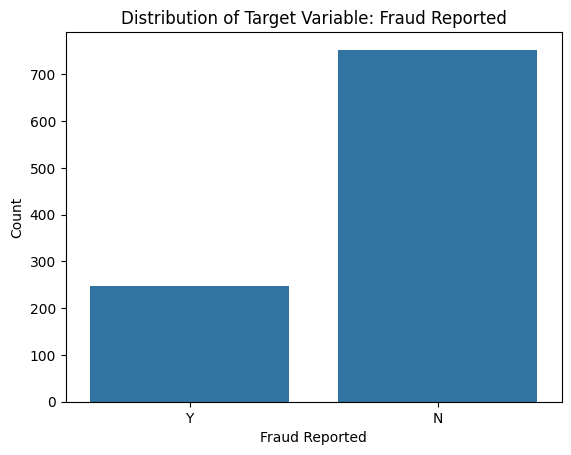

fraud_reported
N    753
Y    247
Name: count, dtype: int64
fraud_reported
N    75.3
Y    24.7
Name: proportion, dtype: float64


In [7]:
sns.countplot(x='fraud_reported', data=data)
plt.title('Distribution of Target Variable: Fraud Reported')
plt.xlabel('Fraud Reported')
plt.ylabel('Count')
plt.show()

# Value counts
print(data['fraud_reported'].value_counts())
print(data['fraud_reported'].value_counts(normalize=True) * 100)


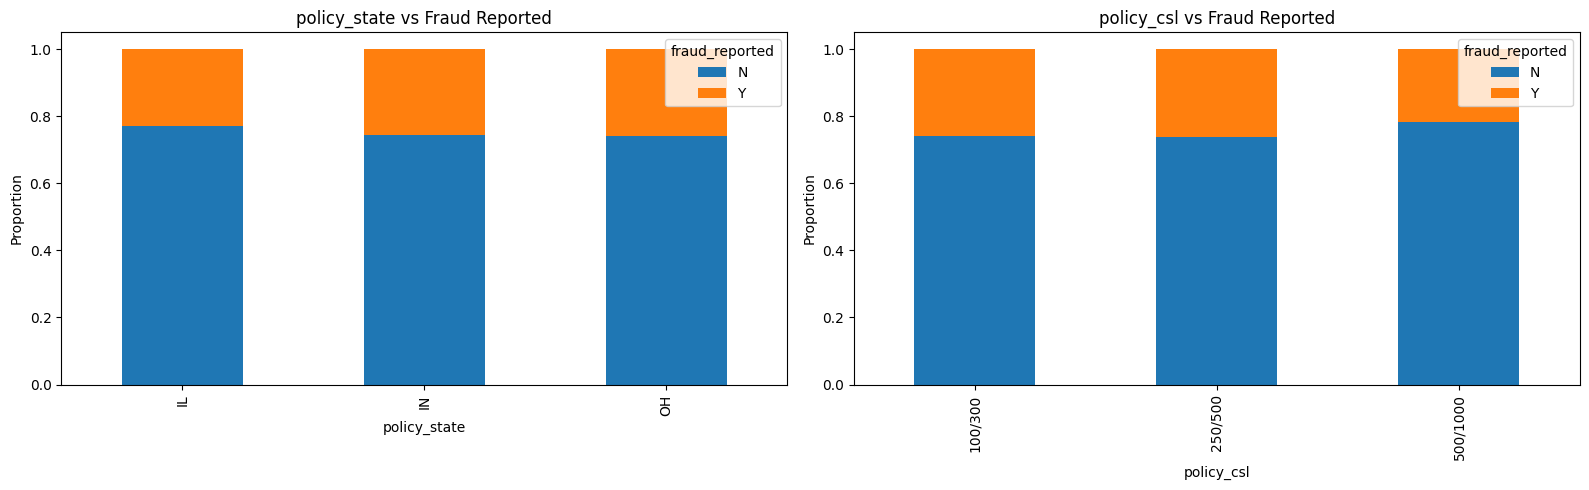

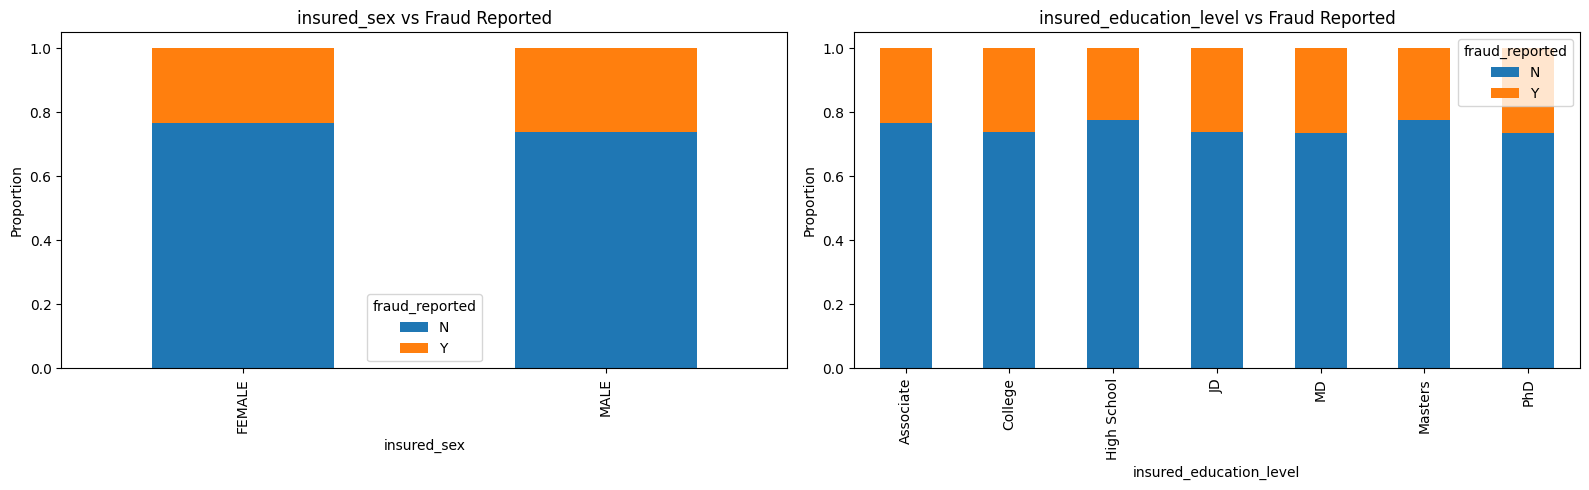

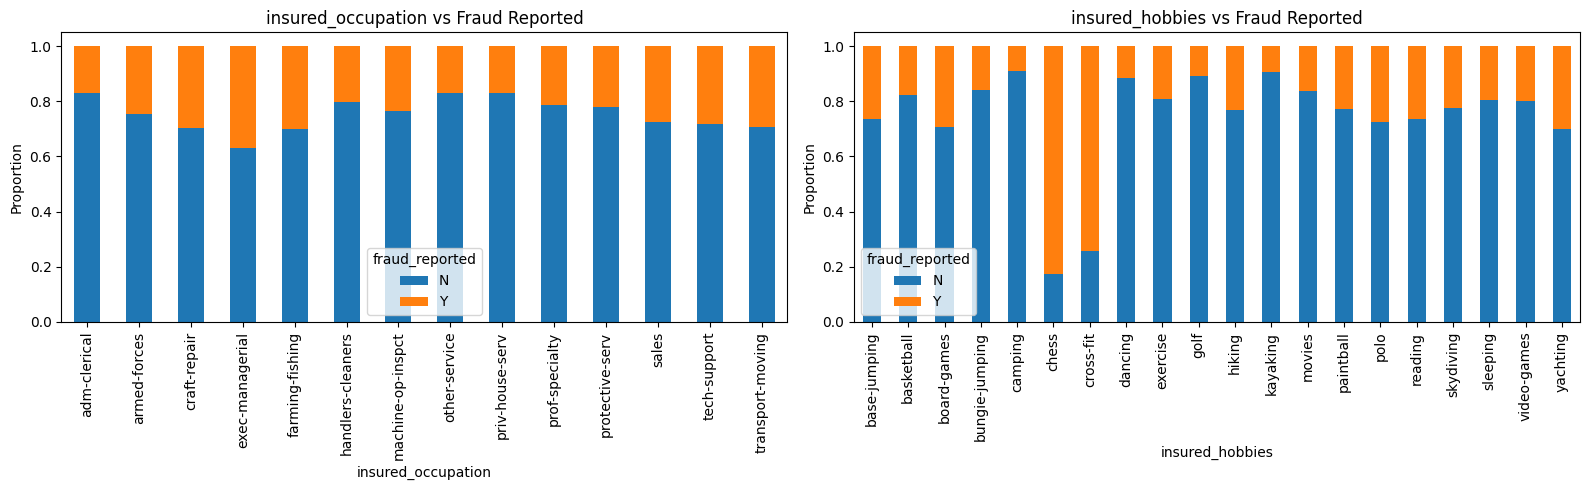

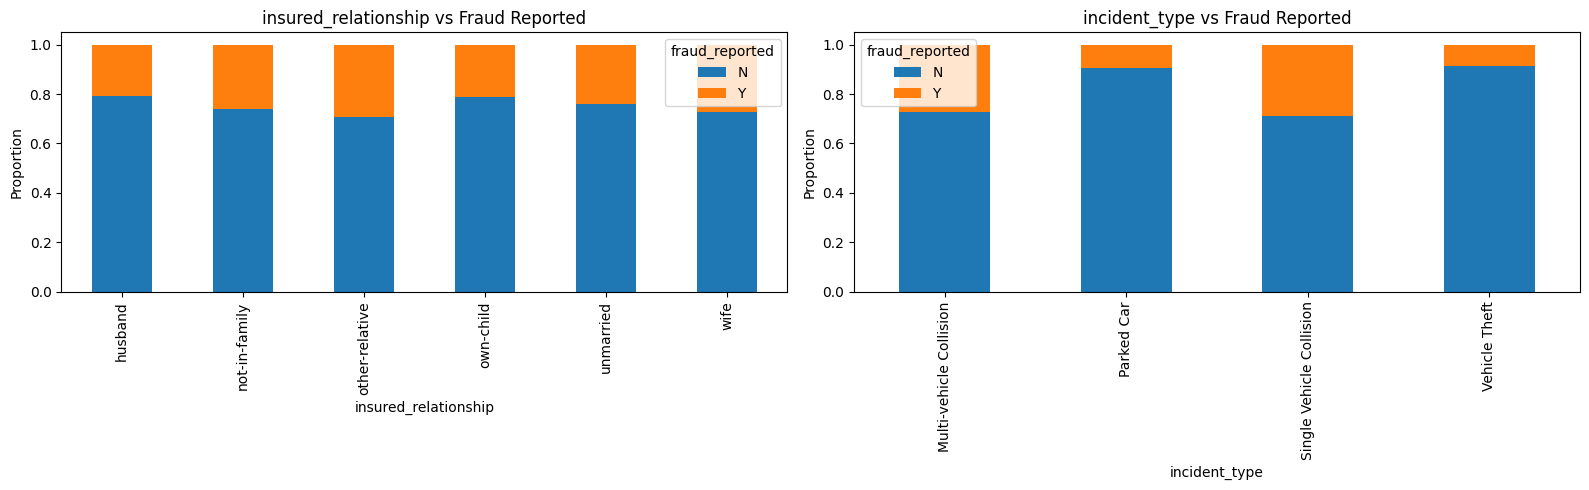

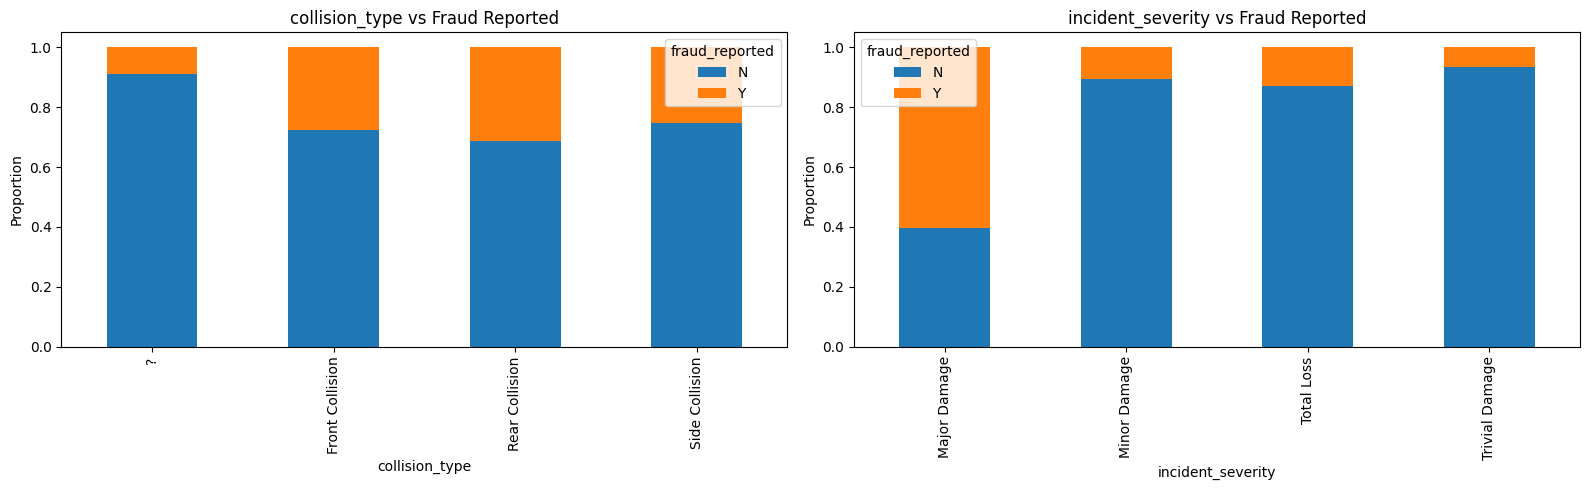

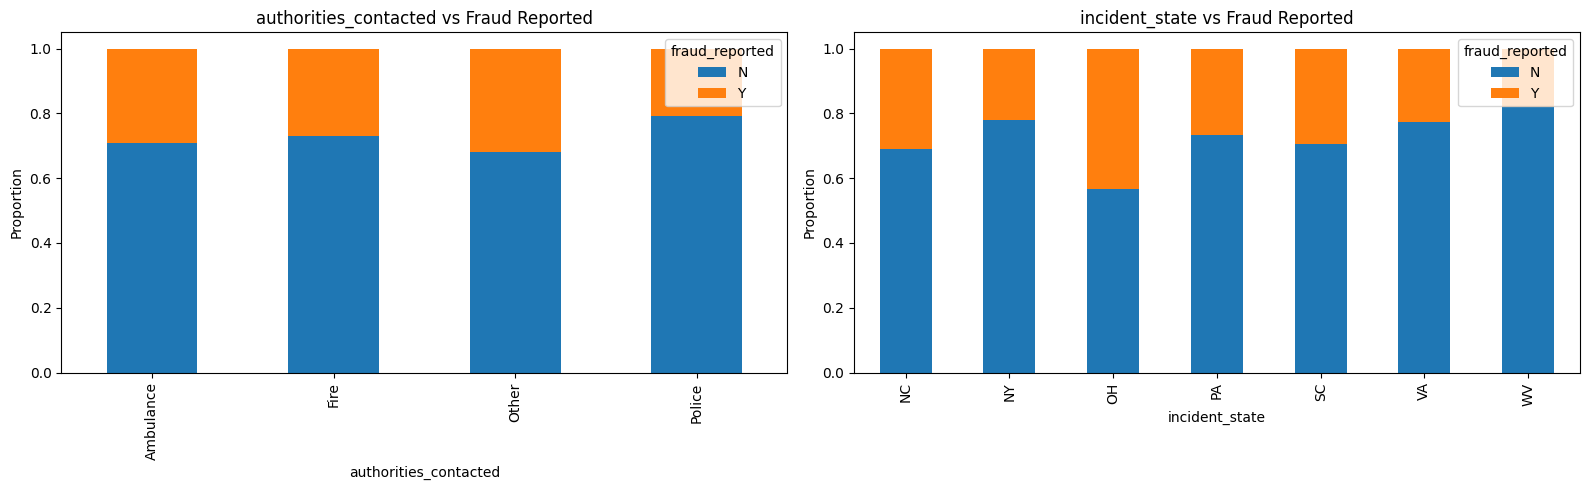

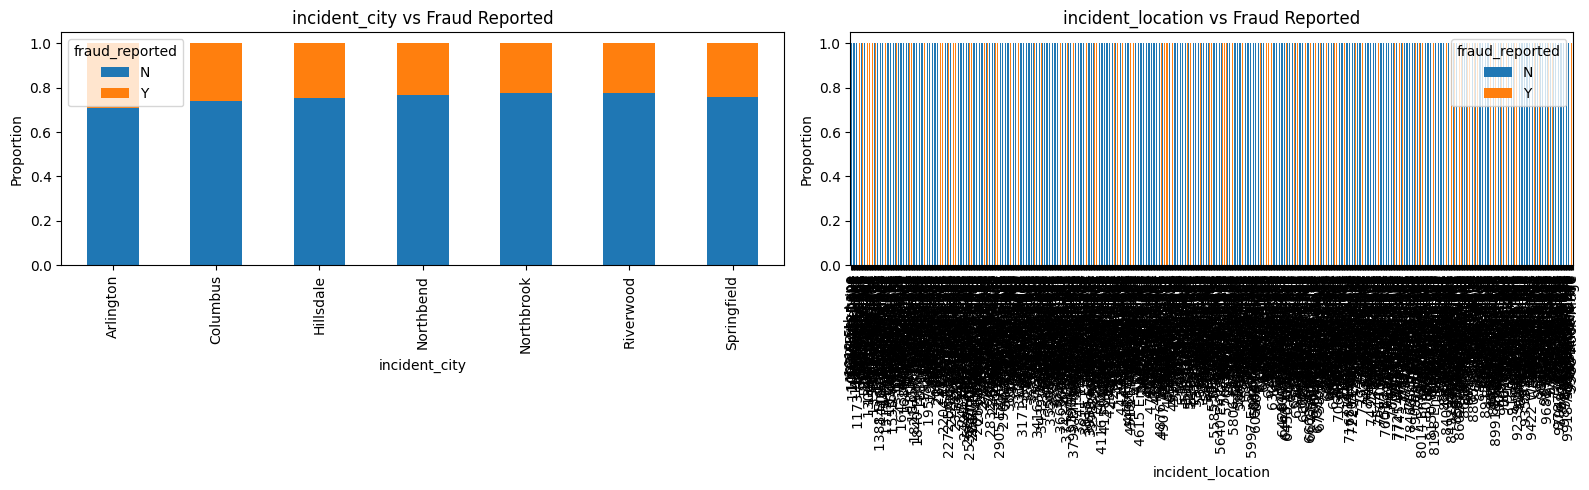

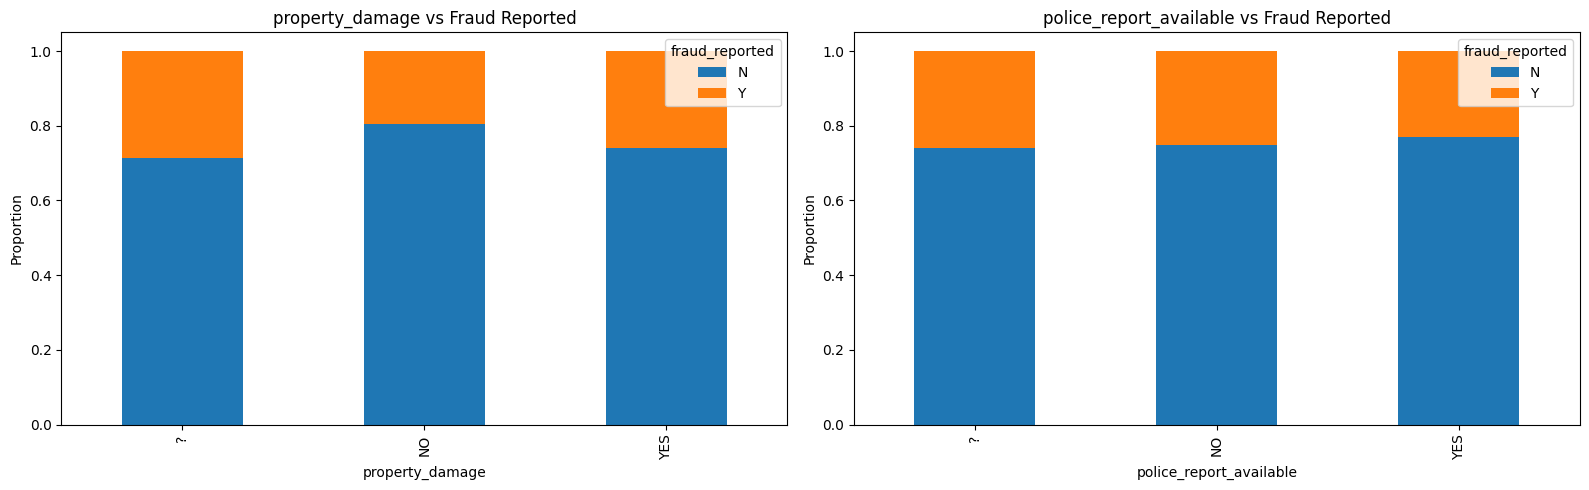

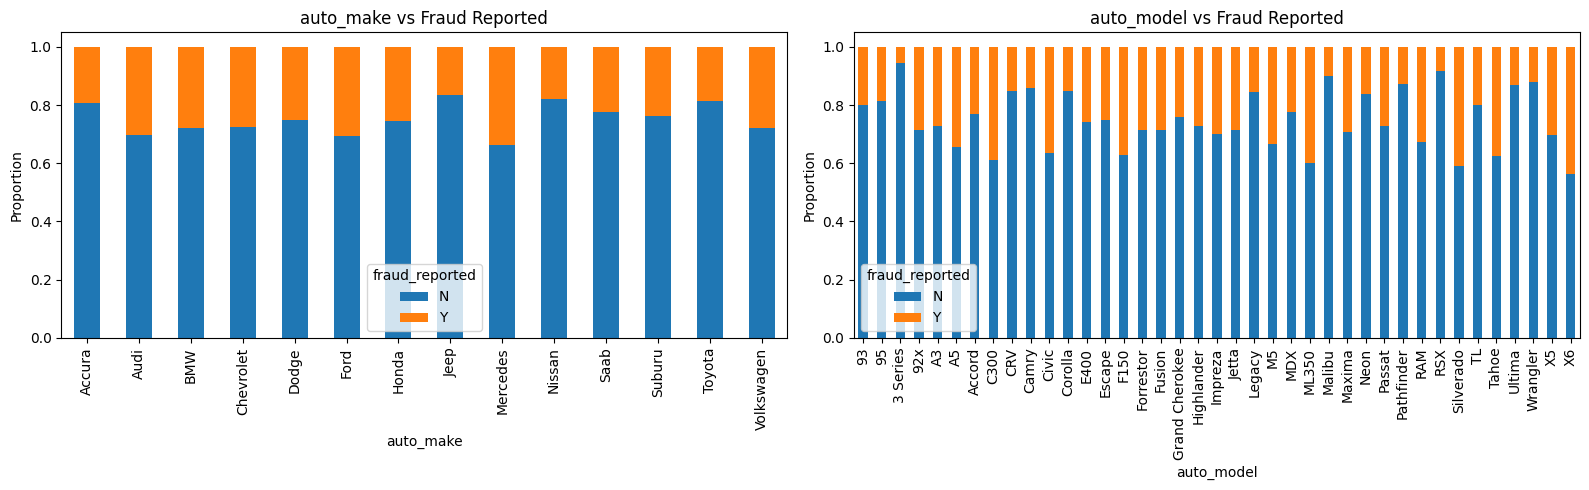

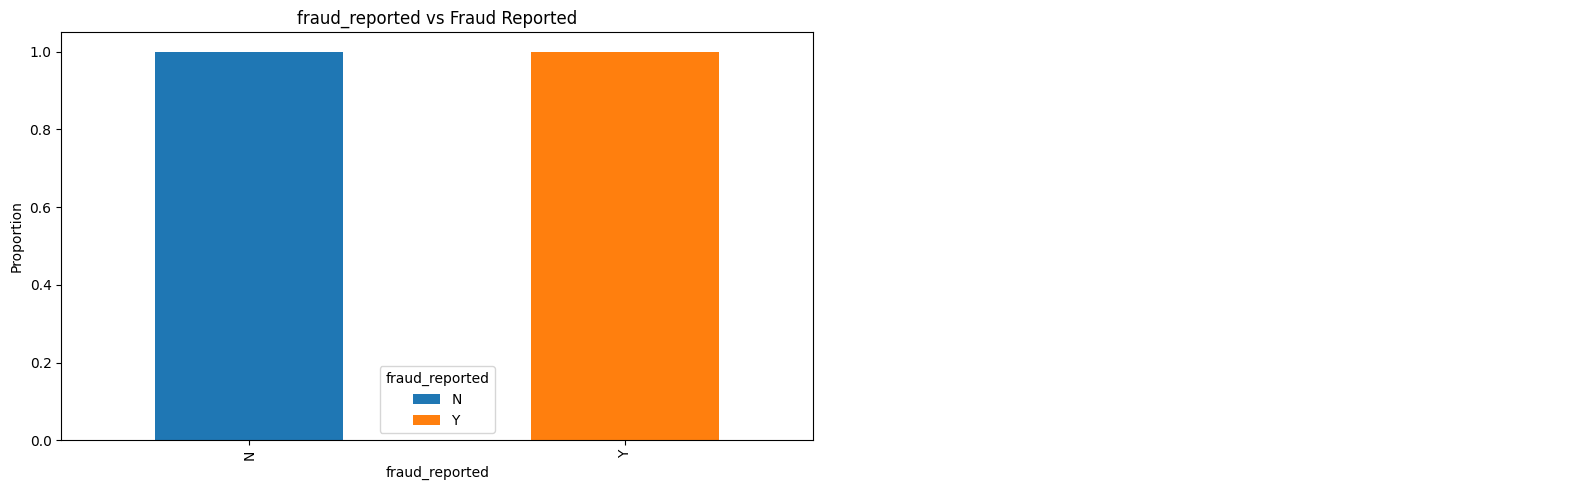

In [8]:
cat_cols = [col for col in data.columns if data[col].dtype=='object']

import matplotlib.pyplot as plt

# Ensure even number of columns by padding with None
if len(cat_cols) % 2 != 0:
    cat_cols.append(None)

for i in range(0, len(cat_cols), 2):
    fig, axes = plt.subplots(1, 2, figsize=(16, 5))
    
    for j in range(2):
        col = cat_cols[i + j]
        ax = axes[j]
        if col is None:
            ax.axis('off')  # Hide empty slot if padding was added
            continue
        ct = pd.crosstab(data[col], data['fraud_reported'], normalize='index')
        ct.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(f"{col} vs Fraud Reported")
        ax.set_ylabel('Proportion')
    
    plt.tight_layout()
    plt.show()


In [9]:
# Get count of all hobbies and their fraud statistics
hobby_analysis = data.groupby('insured_hobbies')['fraud_reported'].agg([
    ('total_count', 'size'),
    ('fraud_count', lambda x: (x == 'Y').sum()),
    ('fraud_rate', lambda x: (x == 'Y').mean())
]).round(3)

# Sort by fraud rate descending to see highest risk hobbies first
hobby_analysis_sorted = hobby_analysis.sort_values('fraud_rate', ascending=False)

print("Hobby Analysis - All Hobbies:")
print("=" * 50)
print(hobby_analysis_sorted)

print("\n" + "=" * 50)
print("Summary Statistics:")
print(f"Total hobbies: {len(hobby_analysis)}")
print(f"Hobbies with fraud rate > 50%: {len(hobby_analysis[hobby_analysis['fraud_rate'] > 0.5])}")
print(f"Hobbies with sample size < 30: {len(hobby_analysis[hobby_analysis['total_count'] < 30])}")

# Show hobbies with small sample sizes
print("\nHobbies with small sample sizes (< 30):")
small_sample = hobby_analysis[hobby_analysis['total_count'] < 30].sort_values('fraud_rate', ascending=False)
print(small_sample)

Hobby Analysis - All Hobbies:
                 total_count  fraud_count  fraud_rate
insured_hobbies                                      
chess                     46           38       0.826
cross-fit                 35           26       0.743
yachting                  53           16       0.302
board-games               48           14       0.292
polo                      47           13       0.277
reading                   64           17       0.266
base-jumping              49           13       0.265
hiking                    52           12       0.231
paintball                 57           13       0.228
skydiving                 49           11       0.224
video-games               50           10       0.200
sleeping                  41            8       0.195
exercise                  57           11       0.193
basketball                34            6       0.176
movies                    55            9       0.164
bungie-jumping            56            9       0.16

In [10]:
print("Chess players vs others - demographic analysis:")
chess_players = data[data['insured_hobbies'] == 'chess']
others = data[data['insured_hobbies'] != 'chess']

# Compare other features for chess players
for col in ['age', 'months_as_customer', 'policy_deductible', 'total_claim_amount']:
    if col in data.columns:
        print(f"{col}: Chess avg = {chess_players[col].mean():.2f}, Others avg = {others[col].mean():.2f}")

Chess players vs others - demographic analysis:
age: Chess avg = 41.89, Others avg = 38.81
months_as_customer: Chess avg = 235.09, Others avg = 202.45
total_claim_amount: Chess avg = 54423.04, Others avg = 52681.84


In [11]:
print("\nCross-fit players vs others - demographic analysis:")
crossfit_players = data[data['insured_hobbies'] == 'cross-fit']
others_no_crossfit = data[data['insured_hobbies'] != 'cross-fit']

for col in ['age', 'months_as_customer', 'total_claim_amount']:
    if col in data.columns:
        print(f"{col}: Cross-fit avg = {crossfit_players[col].mean():.2f}, Others avg = {others_no_crossfit[col].mean():.2f}")

# Compare chess vs cross-fit directly
print("\nChess vs Cross-fit comparison:")
for col in ['age', 'months_as_customer', 'total_claim_amount']:
    if col in data.columns:
        print(f"{col}: Chess avg = {chess_players[col].mean():.2f}, Cross-fit avg = {crossfit_players[col].mean():.2f}")


Cross-fit players vs others - demographic analysis:
age: Cross-fit avg = 39.71, Others avg = 38.92
months_as_customer: Cross-fit avg = 214.09, Others avg = 203.59
total_claim_amount: Cross-fit avg = 60712.57, Others avg = 52473.58

Chess vs Cross-fit comparison:
age: Chess avg = 41.89, Cross-fit avg = 39.71
months_as_customer: Chess avg = 235.09, Cross-fit avg = 214.09
total_claim_amount: Chess avg = 54423.04, Cross-fit avg = 60712.57


In [12]:
# Let's explore this further - check if there's a pattern with tenure and claim amounts
print("Correlation analysis:")
print("Tenure vs Fraud Rate by Hobby:")

# Create a more comprehensive analysis
hobby_detailed = data.groupby('insured_hobbies').agg({
    'fraud_reported': lambda x: (x == 'Y').mean(),
    'months_as_customer': 'mean',
    'total_claim_amount': 'mean',
    'age': 'mean'
}).round(2)

# Sort by fraud rate to see patterns
hobby_detailed_sorted = hobby_detailed.sort_values('fraud_reported', ascending=False)
print(hobby_detailed_sorted.head(10))

# Check correlation between these factors
print(f"\nCorrelation between tenure and fraud rate: {hobby_detailed['months_as_customer'].corr(hobby_detailed['fraud_reported']):.3f}")
print(f"Correlation between claim amount and fraud rate: {hobby_detailed['total_claim_amount'].corr(hobby_detailed['fraud_reported']):.3f}")

Correlation analysis:
Tenure vs Fraud Rate by Hobby:
                 fraud_reported  months_as_customer  total_claim_amount    age
insured_hobbies                                                               
chess                      0.83              235.09            54423.04  41.89
cross-fit                  0.74              214.09            60712.57  39.71
yachting                   0.30              175.26            53565.09  36.87
board-games                0.29              231.77            55489.79  40.69
polo                       0.28              176.66            51328.94  37.21
reading                    0.27              211.44            48716.25  39.22
base-jumping               0.27              181.55            46194.29  37.22
paintball                  0.23              218.46            52081.40  39.72
hiking                     0.23              195.56            57125.19  38.56
skydiving                  0.22              198.41            57958.57  38.59

### Hobby Feature Investigation
- Initial observation: Chess players show 83% fraud rate
- Concern: Could this be spurious correlation due to small sample size?
- Analysis approach: Sample size validation, demographic comparison, correlation analysis

### Key Findings:
- All hobbies have adequate sample sizes (34-64 cases)
- Chess and cross-fit players show genuinely high fraud rates

### Feature Engineering Decision:
- Try Label encoding or group the categories into only 3 distince ones [high_risk, medium_risk, low_risk]

## 🔍 Feature Selection: Categorical Columns

Below is a summary of decisions made after analyzing the relationship between each categorical feature and the target variable `fraud_reported`. The analysis was based on visual inspections of stacked bar plots, looking for class imbalance, signal strength, and cardinality concerns.

| Feature                  | Keep? | Reason                                                                 |
|--------------------------|-------|------------------------------------------------------------------------|
| `policy_state`           | ❌     | Only 3 states (IL, IN, OH) with almost identical fraud distributions. No clear predictive signal. |
| `policy_csl`             | ✅     | Domain-relevant (coverage level), only 3 categories, mild fraud rate variation. |
| `insured_sex`            | ✅     | Retained without modification — moderate signal and low cardinality.  |
| `insured_relationship`   | ✅     | Retained without modification — signal visible across categories.     |
| `incident_type`          | ✅     | Clear variation in fraud rate by type of incident.                    |
| `collision_type`         | ✅     | Categories like "Rear Collision" and "Side Collision" show different patterns — keep as-is. |
| `incident_severity`      | ✅     | Strong signal (e.g., "Major Damage" linked to higher fraud).          |
| `incident_state`         | ✅     | Keep — some states showed variability in fraud rate.                  |
| `incident_city`          | ❌     | Too many cities with very similar fraud distribution — adds noise.    |
| `incident_location`      | ❌     | High cardinality, unique values — no aggregation possible.            |
| `property_damage`        | ✅     | Categories ("?", "YES", "NO") show some signal — retain and encode properly. |
| `police_report_available`| ❌     | Adds little signal beyond what `property_damage` already captures.    |
| `auto_model`             | ❌     | Too many categories,weak signal, redundant with auto_make    |
| `insured_education_level`| ❌     | Only 4% fraud rate range (22.4% to 26.4%) |
| `insured_occupation`     | ✅     | 19.9% fraud rate range (16.9% to 36.8%). Keep all 14 categories |
| `auto_make`              | ✅     |  17.4% fraud rate range (16.4% to 33.8%). Keep all 14 categories - they're all meaningful |



### Deleted all the additional columns that were created for analysis

### ordinal_column = ['insured_education_level', 'incident_severity']

In [13]:
data.shape

(1000, 39)

In [31]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(col):
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # KDE plot (density comparison)
    sns.kdeplot(data=data, x=col, hue='fraud_reported', fill=True,
                common_norm=False, ax=axes[0])
    axes[0].set_title(f'KDE: {col}')
    axes[0].set_xlabel(col)

    # Histogram plot (actual values)
    sns.histplot(data=data, x=col, hue='fraud_reported', bins=50,
                 element='step', stat='count', ax=axes[1])
    axes[1].set_title(f'Histogram: {col}')
    axes[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()
    plt.close()

--- months_as_customer ---


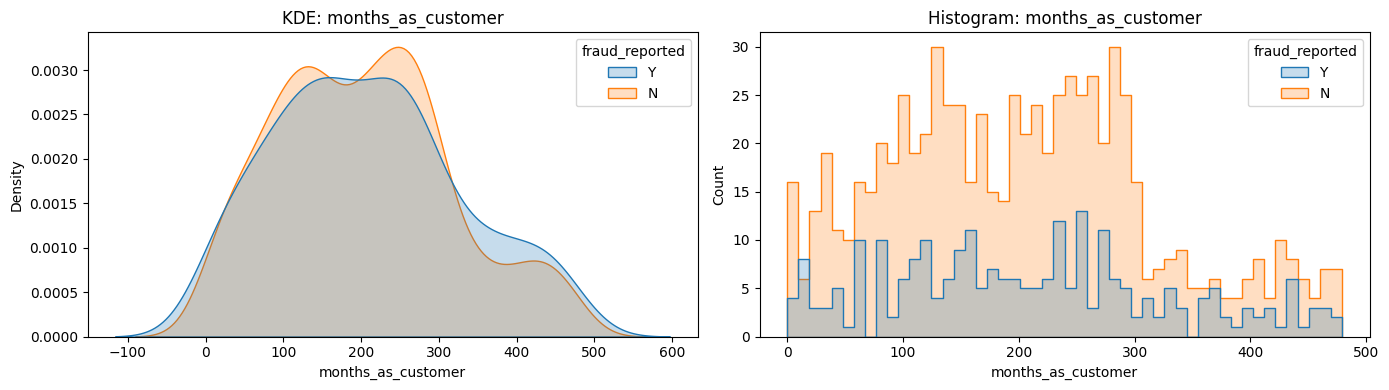

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,202.600266,113.574565,0.0,115.0,200.0,276.0,479.0
Y,247.0,208.080972,119.824064,3.0,116.0,199.0,279.0,478.0


--- age ---


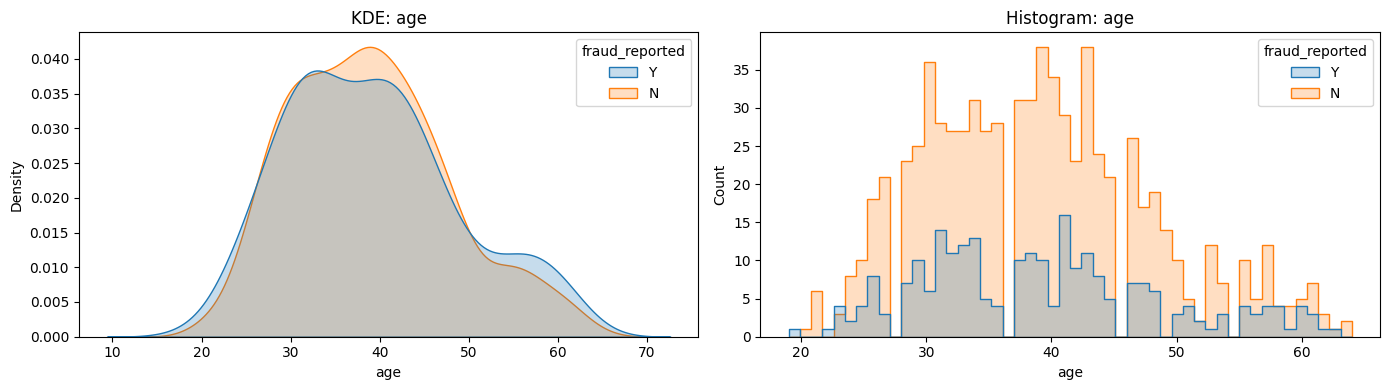

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,38.884462,8.973139,20.0,32.0,38.0,44.0,64.0
Y,247.0,39.141700,9.648295,19.0,32.0,38.0,45.0,63.0


--- policy_deductable ---


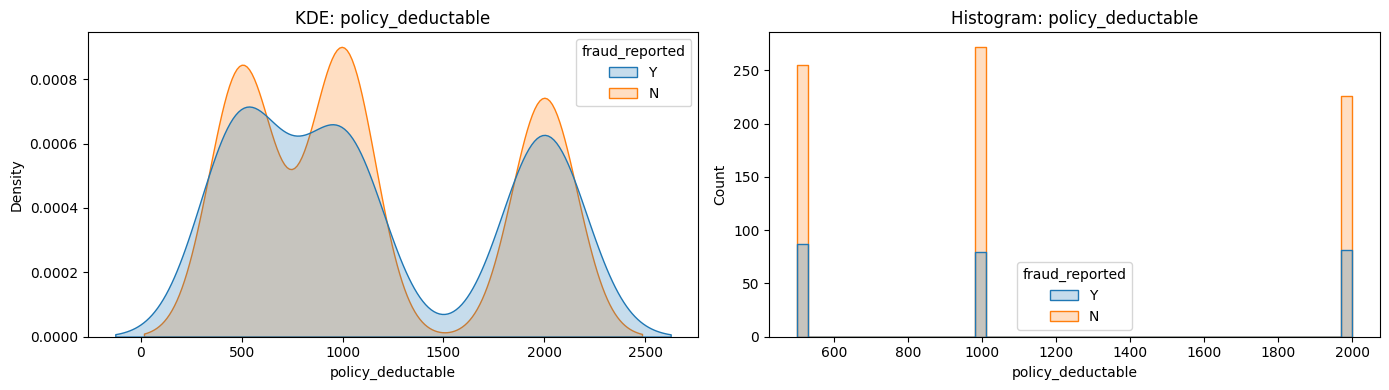

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,1130.810093,606.771634,500.0,500.0,1000.0,2000.0,2000.0
Y,247.0,1151.821862,628.123674,500.0,500.0,1000.0,2000.0,2000.0


--- policy_annual_premium ---


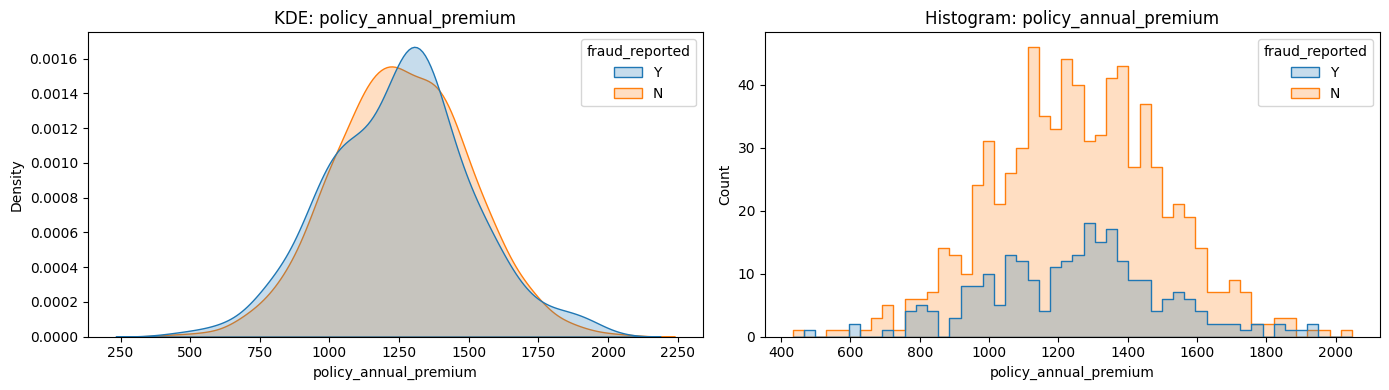

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,1258.430000,241.247210,433.33,1097.640,1253.12,1422.56,2047.59
Y,247.0,1250.236275,253.263651,484.67,1062.615,1269.64,1396.33,1935.85


--- umbrella_limit ---


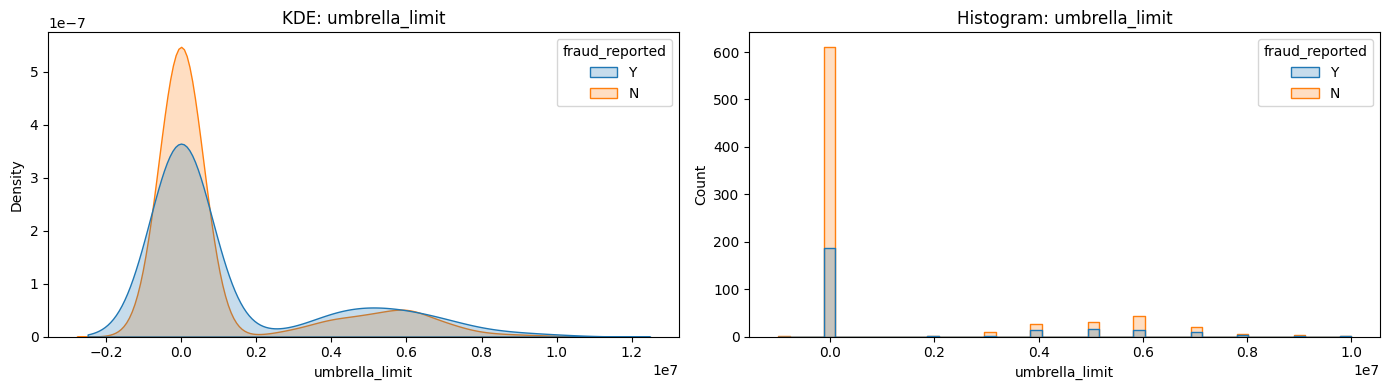

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,1.023904e+06,2.225209e+06,-1000000.0,0.0,0.0,0.0,10000000.0
Y,247.0,1.336032e+06,2.494799e+06,0.0,0.0,0.0,0.0,10000000.0


--- capital-gains ---


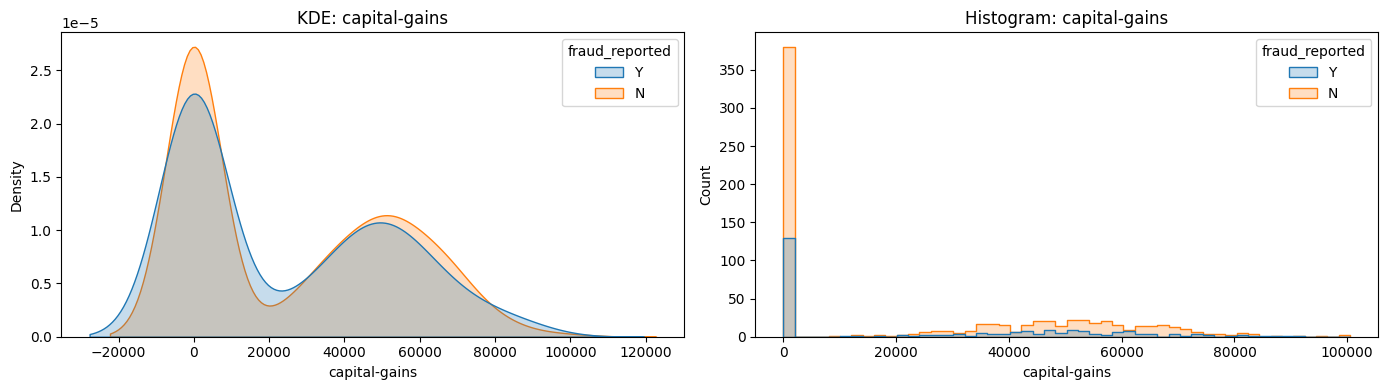

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,25432.005312,27918.464555,0.0,0.0,0.0,51400.0,100500.0
Y,247.0,24193.522267,27766.252081,0.0,0.0,0.0,48850.0,91900.0


--- capital-loss ---


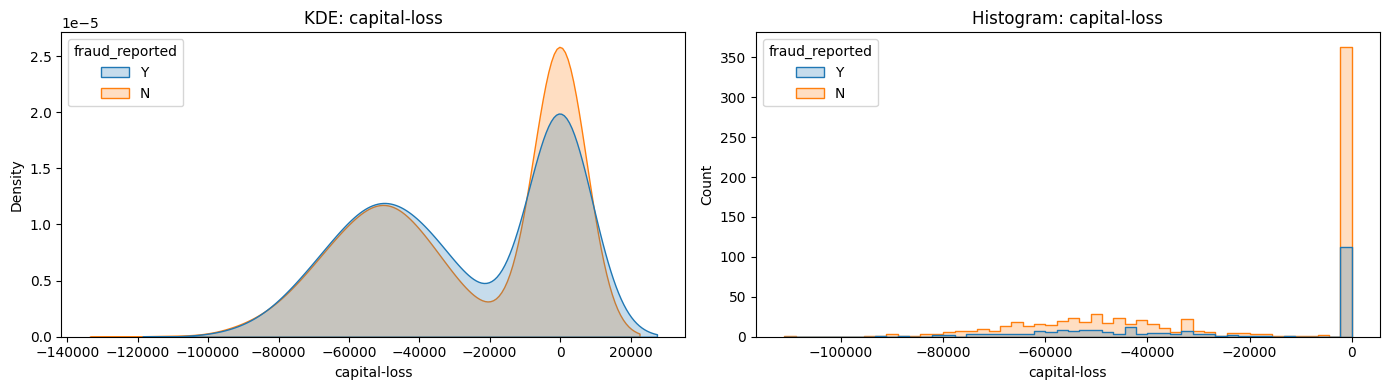

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,-26554.581673,28280.492080,-111100.0,-51400.0,-20400.0,0.0,0.0
Y,247.0,-27522.672065,27603.232184,-91200.0,-51650.0,-30200.0,0.0,0.0


--- incident_hour_of_the_day ---


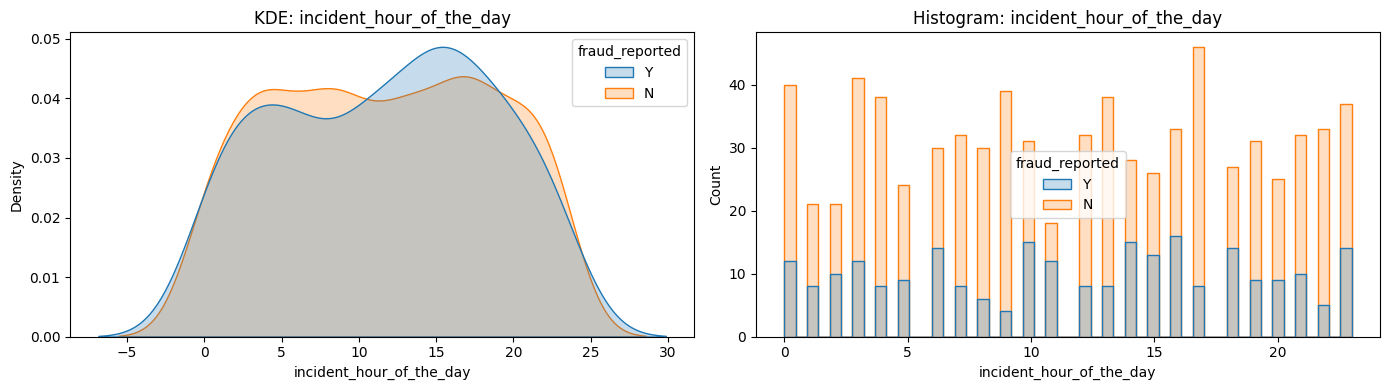

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,11.626826,6.976417,0.0,6.0,12.0,17.0,23.0
Y,247.0,11.696356,6.888256,0.0,6.0,12.0,17.0,23.0


--- number_of_vehicles_involved ---


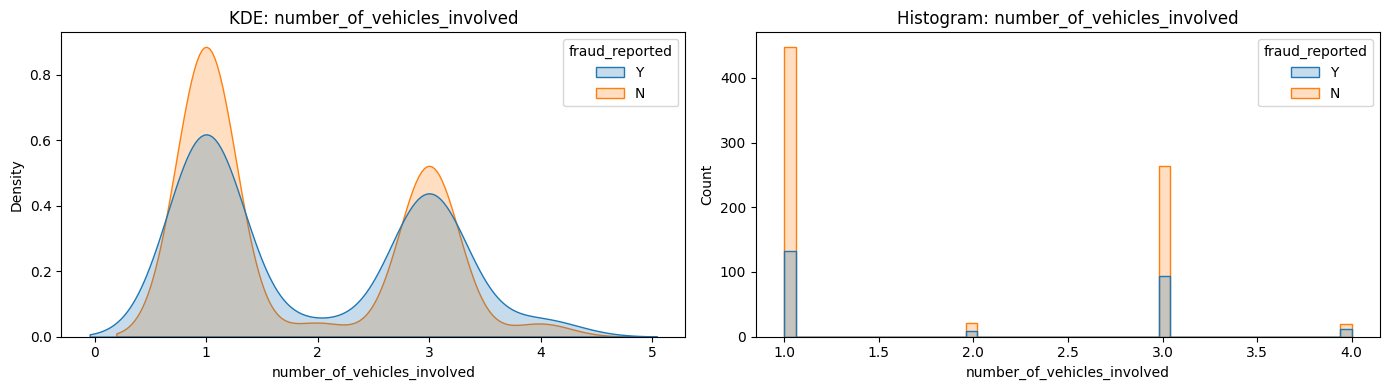

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,1.808765,1.008252,1.0,1.0,1.0,3.0,4.0
Y,247.0,1.931174,1.047315,1.0,1.0,1.0,3.0,4.0


--- bodily_injuries ---


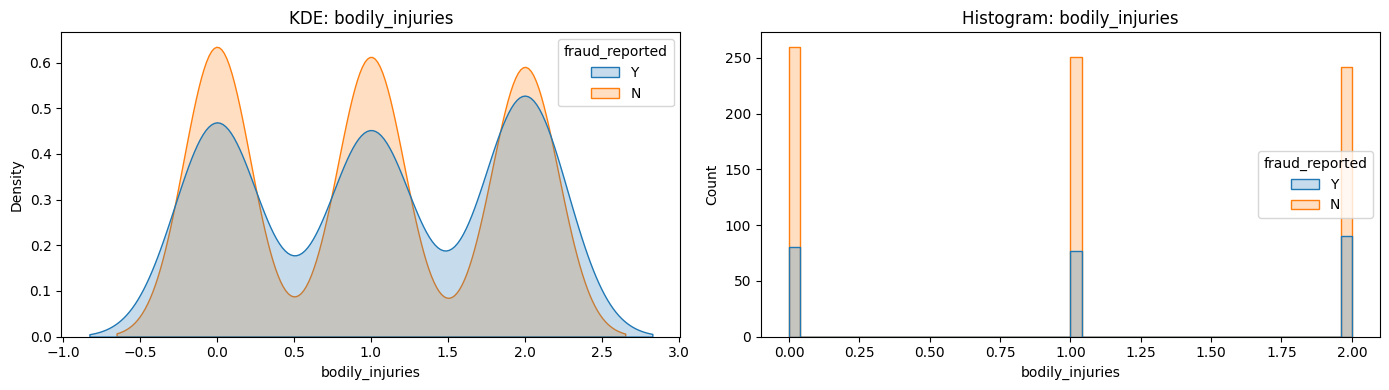

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,0.976096,0.816689,0.0,0.0,1.0,2.0,2.0
Y,247.0,1.040486,0.830308,0.0,0.0,1.0,2.0,2.0


--- witnesses ---


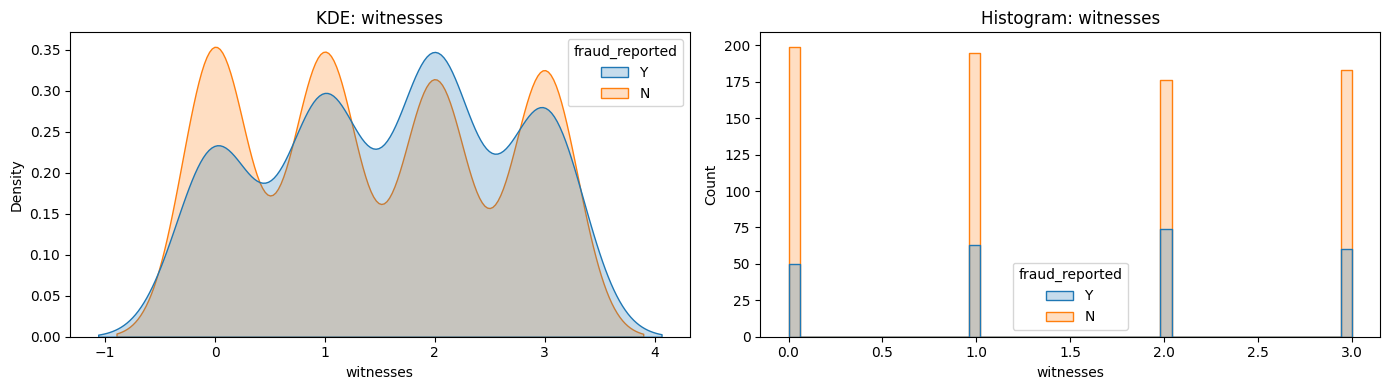

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,1.455511,1.124415,0.0,0.0,1.0,2.0,3.0
Y,247.0,1.582996,1.066962,0.0,1.0,2.0,2.0,3.0


--- total_claim_amount ---


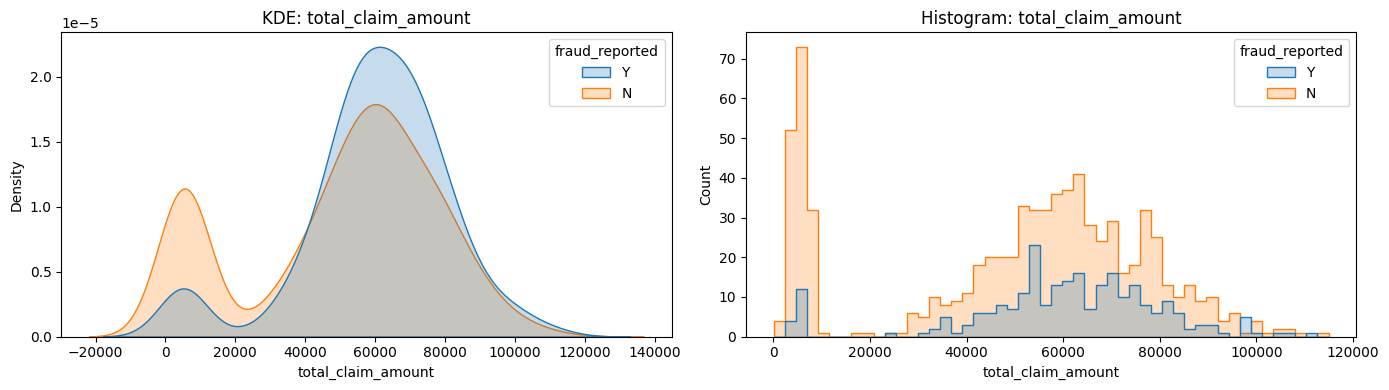

,count,mean,std,min,25%,50%,75%,max
fraud_reported,,,,,,,,
N,753.0,50288.605578,27575.191379,100.0,34650.0,56520.0,69480.0,114920.0
Y,247.0,60302.105263,20746.279567,2860.0,51910.0,61290.0,72665.0,112320.0


In [ ]:
# List of numeric columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Columns to exclude from plotting
exclude_cols = ['policy_number', 'insured_zip', 'auto_year', 'property_claim', 'vehicle_claim', 'injury_claim']

# Filter out excluded columns
filtered_cols = [col for col in numerical_cols if col not in exclude_cols]

# Plot for each numeric column
for col in filtered_cols:
    print(f"--- {col} ---")
    plot_distribution(col)
    display(data.groupby("fraud_reported")[col].describe())


### Drop policy_number, auto_year, insured_zip

### Keep age column as it is
### Keep policy_anual_premium as it is

In [34]:
data['policy_deductable'].nunique()

3

### Convert Policy deductable to categorical, since values are 3 descrete buckets

In [41]:
print(data['umbrella_limit'].min(), data['umbrella_limit'].max())


-1000000 10000000


In [42]:
print(data['umbrella_limit'].dtype)
print(data['umbrella_limit'].unique())  # peek at raw values

int64
[       0  5000000  6000000  4000000  3000000  8000000  7000000  9000000
 10000000 -1000000  2000000]


In [45]:
len([data['umbrella_limit']==-1000000])

1

### There's a data entry error in the umbrella limit columns having 1 negative value that we will convert to positive.

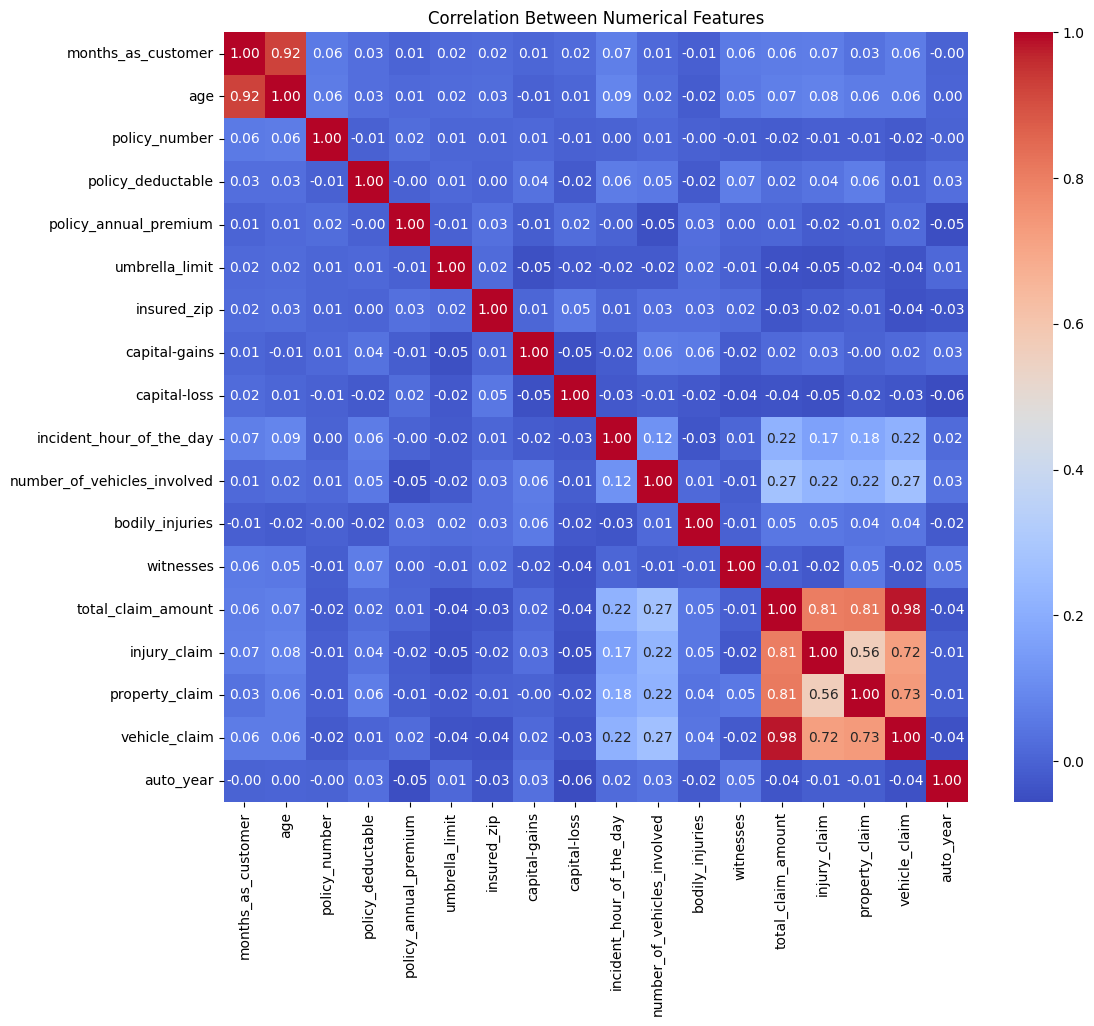

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check collinearity among numeric features
corr = data.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Between Numerical Features")
plt.show()

### Total Claim, injury claim, property claim, vehicle claim all are highly related. Keep only 'Total Claim'

In [56]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [61]:
from dateutil.relativedelta import relativedelta

def month_diff(row):
    return relativedelta(row['incident_date'], row['policy_bind_date']).years * 12 + \
           relativedelta(row['incident_date'], row['policy_bind_date']).months

data['tenure_calc'] = data.apply(month_diff, axis=1)
(data['months_as_customer'] != data['tenure_calc']).sum()


992

| Column Name                   | Keep? | Action / Justification                                                                   |
| ----------------------------- | ----- | ---------------------------------------------------------------------------------------- |
| `months_as_customer`          | ✅     | Keep as-is. Mostly aligns with incident date - bind date. Rounded mismatch in \~1k rows. |
| `age`                         | ✅     | Keep as-is. Bucket only if strong non-linear fraud pattern is observed.                  |
| `policy_number`               | ❌     | Drop. High cardinality ID — no predictive value.                                         |
| `insured_zip`                 | ❌     | Drop. High cardinality, low signal.                                                      |
| `auto_year`                   | ❌     | Drop. Weak signal, mostly redundant with `auto_make/model`.                              |
| `policy_deductable`           | 🔁    | Convert to categorical. Only 3 discrete values — better treated as a category.           |
| `policy_annual_premium`       | ✅     | Keep as-is. Important cost-related numerical signal.                                     |
| `umbrella_limit`              | ✅     | One incorrect negative value. Fix by converting `-1000000` → `1000000`.                  |
| `capital-gains`               | ✅     | Keep. No issues observed.                                                                |
| `capital-loss`                | ✅     | Keep. Good fraud signal observed in distribution.                                        |
| `incident_hour_of_the_day`    | ✅     | Keep. Clear signal — hourly patterns in fraud likelihood.                                |
| `number_of_vehicles_involved` | ✅     | Keep. Strong pattern — more vehicles = more fraud suspicion.                             |
| `bodily_injuries`             | ✅     | Keep. Helpful for incident severity.                                                     |
| `witnesses`                   | ✅     | Keep. Clear correlation with fraud.                                                      |
| `total_claim_amount`          | ✅     | Keep. Strong signal with fraud amount.                                                   |
| `injury_claim`                | ❌     | Drop. Redundant with `total_claim_amount`.                                               |
| `property_claim`              | ❌     | Drop. Redundant with `total_claim_amount`.                                               |
| `vehicle_claim`               | ❌     | Drop. Redundant with `total_claim_amount`.                                               |


In [62]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'tenure_calc'],
      dtype='object')

In [63]:
(data['months_as_customer'] > data['tenure_calc']).mean()


0.616

In [68]:
from dateutil.relativedelta import relativedelta

# Function to calculate the number of full months between bind and incident
def from_bind_to_incident_months(row):
    diff = relativedelta(row['incident_date'], row['policy_bind_date'])
    return diff.years * 12 + diff.months

# Ensure date columns are datetime
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'])
data['incident_date'] = pd.to_datetime(data['incident_date'])

# Apply the function to compute safe tenure
data['from_bind_to_incident_months'] = data.apply(from_bind_to_incident_months, axis=1)

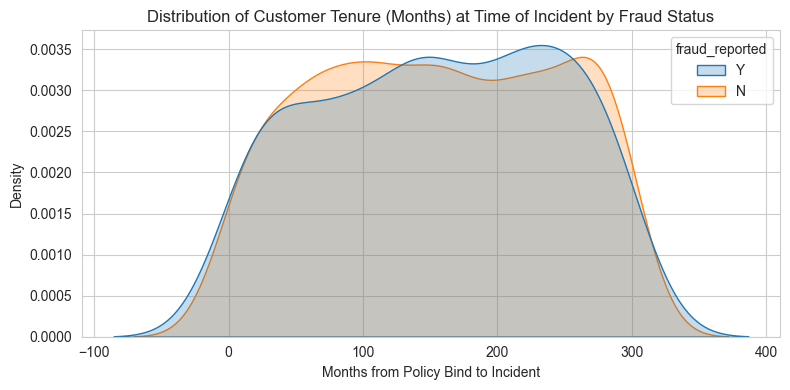

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.kdeplot(
    data=data,
    x='from_bind_to_incident_months',
    hue='fraud_reported',
    fill=True,
    common_norm=False
)
plt.title('Distribution of Customer Tenure (Months) at Time of Incident by Fraud Status')
plt.xlabel('Months from Policy Bind to Incident')
plt.tight_layout()
plt.show()


In [70]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported',
       'from_bind_to_incident_months'],
      dtype='object')

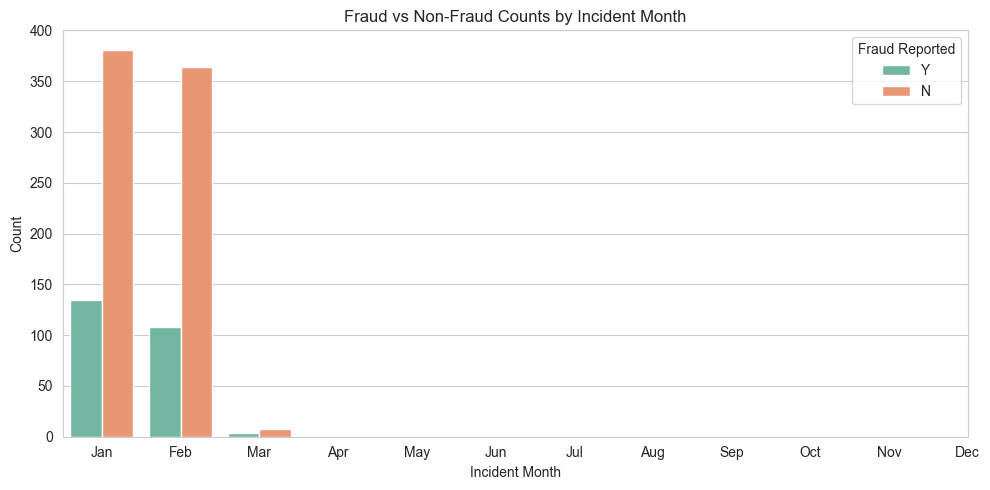


Fraud Rate by Month:
incident_month
1    0.261628
2    0.228814
3    0.333333
Name: fraud_reported, dtype: float64


In [71]:
# Ensure incident_date is in datetime format
data['incident_date'] = pd.to_datetime(data['incident_date'])

# Extract incident month and year
data['incident_month'] = data['incident_date'].dt.month
data['incident_year'] = data['incident_date'].dt.year  # optional

# Plot fraud count per month
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='incident_month', hue='fraud_reported', palette='Set2')
plt.title("Fraud vs Non-Fraud Counts by Incident Month")
plt.xlabel("Incident Month")
plt.ylabel("Count")
plt.xticks(ticks=range(0, 12), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.legend(title="Fraud Reported")
plt.tight_layout()
plt.show()

# Optionally, calculate fraud rate per month
monthly_fraud_rate = (
    data.groupby('incident_month')['fraud_reported']
    .apply(lambda x: (x == 'Y').mean())
)

print("\nFraud Rate by Month:")
print(monthly_fraud_rate)


### Can't check for seasonality, data is distributed across only 3 months